### Hotel Booking Data Analysis 📊

#### 🎯 Project Aim

#### The aim of this project is to perform a comprehensive analysis of hotel booking data to gain a deeper understanding of customer behavior, booking patterns, and cancellation trends. Through the use of Exploratory Data Analysis (EDA), this project seeks to identify seasonal demand variations, popular room and meal preferences, booking sources, and guest demographics. The ultimate goal is to extract meaningful business insights that can help hotels improve strategic decision-making, reduce unnecessary cancellations, optimize room allocation and pricing strategies, enhance resource utilization, and deliver better overall customer satisfaction.

#### 🏨 Domain: Hospitality & Travel Analytics

##### ✅ Project Objectives

1 - To analyze hotel booking data to understand overall booking behavior and trends.

2 - To identify key factors influencing hotel booking cancellations.

3 - To study seasonal and monthly demand patterns in hotel reservations.

4 - To analyze customer demographics such as adults, children, and repeated guests.

5 - To evaluate the impact of lead time, room type, and meal type on bookings.

6 - To understand the role of market segments and distribution channels in hotel bookings.

7 - To provide data-driven recommendations to improve hotel performance.

8 - To support better decision-making in pricing, marketing, and resource planning.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\MOHAMMED SHIBIL.C\Downloads\hotel_bookings.csv 1.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### finding null values

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Replace null values

##### replace null values of children column with 0


In [14]:

df['children']=df['children'].fillna(0)
df['children'].isnull().sum()

np.int64(0)

##### fill Null with mean

In [15]:
df['children'] = df['children'].fillna(df['children'].mean())

df['children'].head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: children, dtype: float64

 ##### Replace null values of country column with "unknown"


In [16]:
df['country']=df['country'].fillna('unknown')
df['country'].isnull().sum()

np.int64(0)

 ##### Replace null values of agent column with "Mean value of agent"


In [17]:
df.loc[:, 'agent'] = df['agent'].fillna(df['agent'].mode()[0])



In [18]:
df['agent'].isnull().sum()

np.int64(0)

 ##### Replace null values of agent column with "mode value of company"


In [19]:

df['company'] = df['company'].astype(str)
df['company'] = df['company'].fillna('unknown')



In [20]:
df['company'].isnull().sum()


np.int64(0)

### replace null values of stay total nights with mean value

In [21]:
df['stay_total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [22]:
df.loc[:, 'stay_total_nights'] = df['stay_total_nights'].fillna(df['stay_total_nights'].mean())

In [23]:
df['stay_total_nights'].isnull().sum()


np.int64(0)

In [24]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Remove Duplicate Rows

In [25]:
df.duplicated().sum()

np.int64(31995)

In [26]:
df = df.drop_duplicates()



In [27]:
df.duplicated().sum()

np.int64(0)

###### Correct Data Types

In [28]:
##### convert string to datetime

df['reservation_status_date'] = pd.to_datetime(df[ 'reservation_status_date'])



In [29]:
df['reservation_status_date'].describe()


count                            87395
mean     2016-08-31 03:40:18.769952512
min                2014-10-17 00:00:00
25%                2016-03-18 00:00:00
50%                2016-09-08 00:00:00
75%                2017-03-05 00:00:00
max                2017-09-14 00:00:00
Name: reservation_status_date, dtype: object

In [30]:
df[['reservation_status_date']].head()


,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


In [31]:
##### convert object to integer

df['children'] = df['children'].astype('int')

In [32]:
df['children'].dtype

dtype('int64')

In [33]:
df[['children']].head()

,children
0,0
1,0
2,0
3,0
4,0


### Create Derived Columns

In [34]:

##### Total people

df['total_people'] = df['adults'] + df['children'] + df['babies']

df['total_people'].describe()

count    87395.000000
mean         2.025253
std          0.794324
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: total_people, dtype: float64

In [35]:
df['total_people'].dtype

dtype('int64')

In [36]:
df[['adults', 'children', 'babies', 'total_people']].head()


,adults,children,babies,total_people
0,2,0,0,2
1,2,0,0,2
2,1,0,0,1
3,1,0,0,1
4,2,0,0,2


In [37]:
df['stay_total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [38]:
df['stay_total_nights'].head()

0    0
1    0
2    1
3    1
4    2
Name: stay_total_nights, dtype: int64

In [39]:
df['stay_total_nights'].describe()

count    87395.000000
mean         3.630654
std          2.763464
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: stay_total_nights, dtype: float64

In [40]:
#### view

df[['stays_in_week_nights', 'stays_in_weekend_nights','stay_total_nights']].head()

,stays_in_week_nights,stays_in_weekend_nights,stay_total_nights
0,0,0,0
1,0,0,0
2,1,0,1
3,1,0,1
4,2,0,2


In [41]:
#### first 10 column

df[['stays_in_week_nights', 'stays_in_weekend_nights','stay_total_nights']].head(10)


,stays_in_week_nights,stays_in_weekend_nights,stay_total_nights
0,0,0,0
1,0,0,0
2,1,0,1
3,1,0,1
4,2,0,2
6,2,0,2
7,2,0,2
8,3,0,3
9,3,0,3
10,4,0,4


In [42]:
df.isnull().sum()  

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [43]:
df[df.isnull().any(axis=1)]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stay_total_nights,total_people


In [44]:
df.isnull().any(axis=0)


hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


##### Drop the row with Nan

In [45]:
df = df.dropna() 

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
df.isnull().sum()  

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [48]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,stay_total_nights,total_people
count,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,...,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395,87395.000000,87395.000000
mean,0.274901,79.892282,2016.210287,26.838458,15.815527,1.005263,2.625390,1.875794,0.138635,0.010824,...,0.183992,0.271606,82.261125,0.749574,106.337124,0.084227,0.698553,2016-08-31 03:40:18.769952512,3.630654,2.025253
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,69.000000,55.000000
std,0.446467,86.052393,0.686101,13.674601,8.835196,1.031927,2.053595,0.626504,0.455874,0.113597,...,1.731903,0.727249,109.061525,10.015788,55.014256,0.281535,0.831939,NaN,2.763464,0.794324


In [49]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'stay_total_nights',
       'total_people'],
      dtype='object')

In [52]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [51]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Object should covert to > Category

In [54]:
cat_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status', 'company'
]
df[cat_cols] = df[cat_cols].astype('category')

In [55]:
df[cat_cols].dtypes


hotel                   category
arrival_date_month      category
meal                    category
country                 category
market_segment          category
distribution_channel    category
reserved_room_type      category
assigned_room_type      category
deposit_type            category
customer_type           category
reservation_status      category
company                 category
dtype: object

##### Agent column → convert float to int after filling missing

In [56]:
df['agent'] = df['agent'].fillna(0).astype(int)

In [58]:
df['agent'].dtype


dtype('int64')

In [59]:
df.dtypes


hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

### Exploratory Data Analysis - EDA 

Exploratory Data Analysis (EDA) is the first step in data analysis where we explore and understand the dataset. It helps to check the structure of the data, identify missing values, detect outliers, understand data types, and find patterns or relationships. Using summary statistics and visualizations like graphs and charts, EDA gives a clear idea of the data’s quality and characteristics. Overall, it prepares the data for cleaning and modeling and helps in making better decisions.

In [4]:
df.shape


(119390, 32)

In [5]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

##### Value Count of Hotel

In [6]:
df['hotel'].value_counts()


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

##### Value Count of Meal

In [7]:
df['meal'].value_counts()


meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

##### Value Count of Market Segment

In [8]:
df['market_segment'].value_counts()


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

##### Value Count of Market Reservation Status

In [9]:
df['reservation_status'].value_counts()


reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

##### Statistical Summary about Lead_time

In [10]:
df['lead_time'].describe()


count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

##### Statistical Summary about Stays in week nights 

In [11]:
df['stays_in_week_nights'].describe()


count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

##### Statistical Summary about Adults

In [12]:
df['adults'].describe()


count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

##### Statistical Summary about Children

In [13]:
df['children'].describe()


count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

#### Hotel Distribution

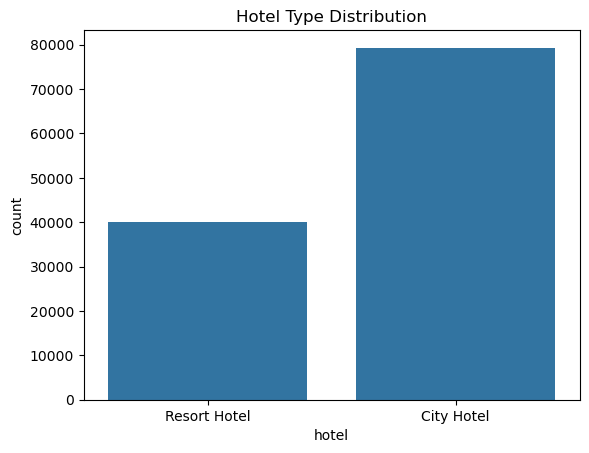

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='hotel')
plt.title("Hotel Type Distribution")
plt.show()


### Insight

#### City Hotels have more bookings than Resort Hotels, showing higher customer preference for city locations

#### Lead Time Distribution

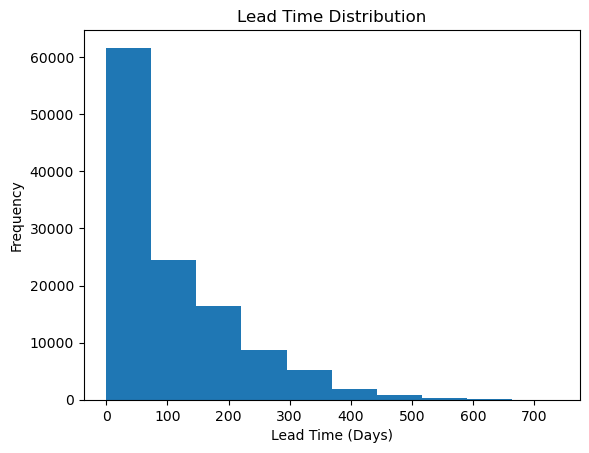

In [15]:
plt.hist(df['lead_time'])
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()

### Insight

#### Most customers book well in advance, with a long tail of last-minute bookings.

##### Overall Cancellation Rate

Overall Cancellation Rate: 37.04%


C:\Users\MOHAMMED SHIBIL.C\AppData\Local\Temp\ipykernel_16036\1617217617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='mako',legend = False)


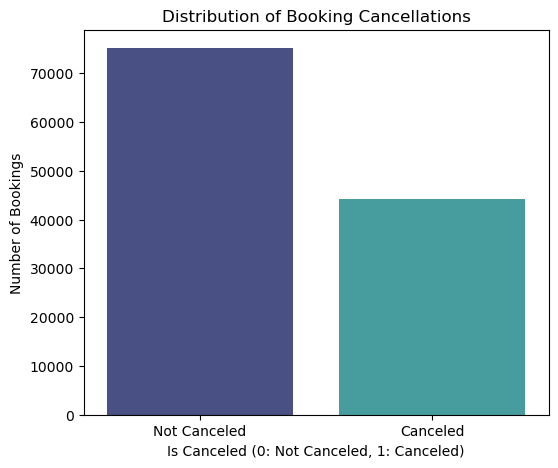

In [28]:
# Calculate cancellation percentage
cancellation_percentage = df['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancellation_percentage:.2f}%")

# Visualize cancellation distribution 
plt.figure(figsize=(6, 5))
sns.countplot(x='is_canceled', data=df, palette='mako',legend = False)
plt.title('Distribution of Booking Cancellations')
plt.xlabel('Is Canceled (0: Not Canceled, 1: Canceled)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.savefig('cancellation_distribution_mako.png')


### Insight

#### Most bookings are not canceled, but a noticeable number of cancellations still occur, impacting hotel revenue

### Total Bookings by Arrival Month

C:\Users\MOHAMMED SHIBIL.C\AppData\Local\Temp\ipykernel_16036\3779478205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_date_month', data=df, order=month_order, palette='crest')


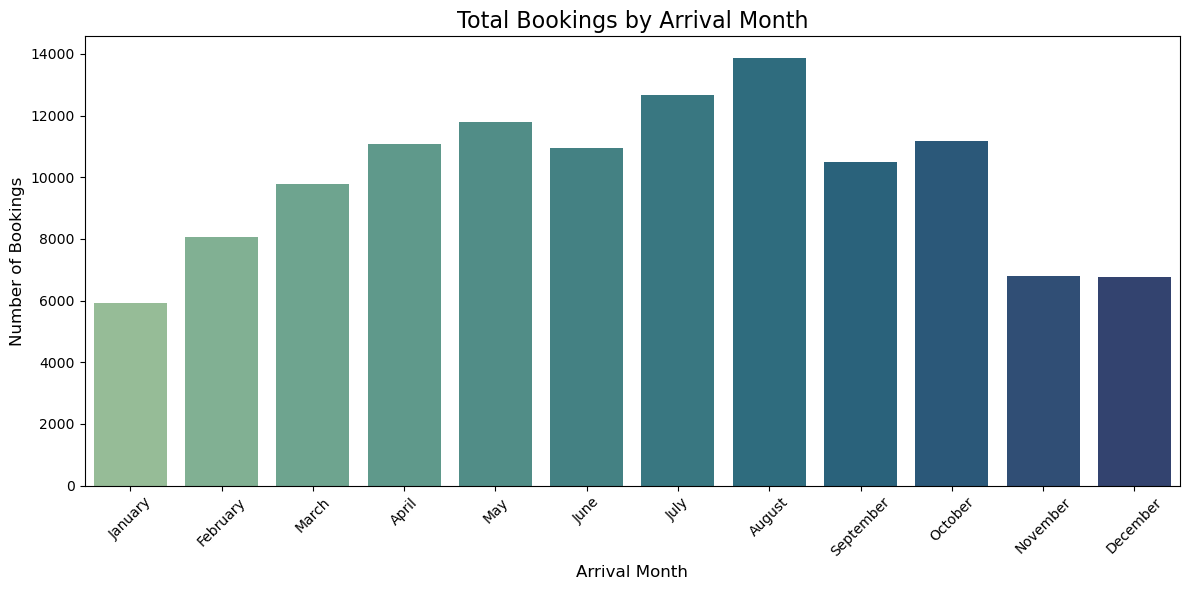

In [32]:


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
# Using the 'crest' palette (light to dark blue/green) to show volume progression
sns.countplot(x='arrival_date_month', data=df, order=month_order, palette='crest')
plt.title('Total Bookings by Arrival Month', fontsize=16)
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight


#### The graph shows clear seasonal trends, with some months receiving higher bookings than others, indicating peak and off-peak travel periods

#### Popular Hotel Type

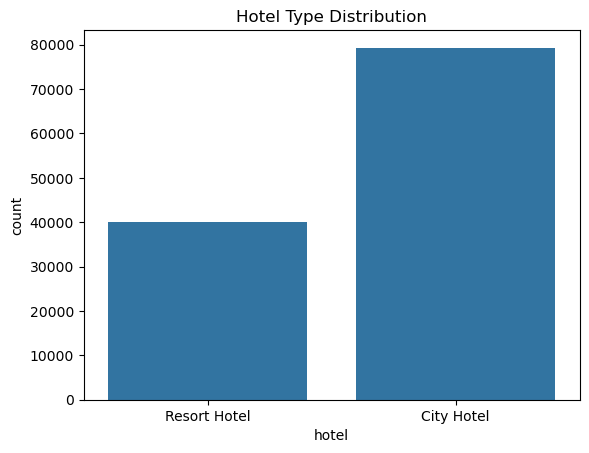

In [3]:
sns.countplot(data=df, x='hotel')
plt.title("Hotel Type Distribution")
plt.show()

### Insight

##### This chart shows whether City Hotels or Resort Hotels receive more bookings, with City Hotels generally showing higher demand due to their convenient locations and popularity among business travellers.

#### Hotel Type Share (Pie Chart)

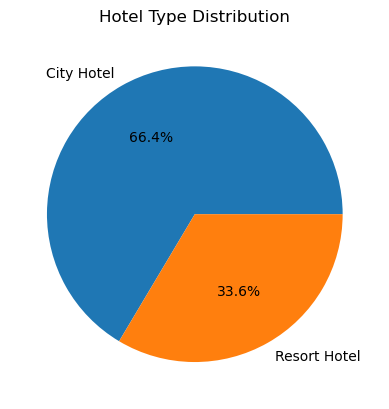

In [5]:
df['hotel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Hotel Type Distribution")
plt.ylabel("")
plt.show()

### Insight

##### City hotels have the highest bookings, showing strong demand for business travel locations.

#### Donut Chart – Booking Status (Cancelled vs Not)

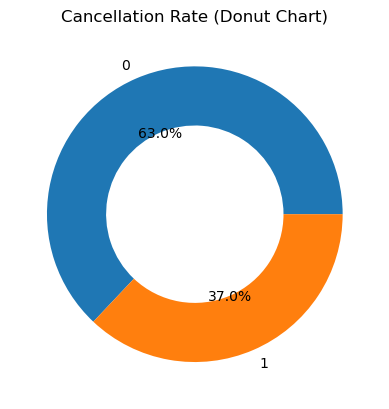

In [6]:
sizes = df['is_canceled'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Cancellation Rate (Donut Chart)")
plt.show()

### Insight

##### A considerable percentage of bookings are cancelled, leading to revenue loss.

#### Top 10 Countries(Horizontal Bar Chart)

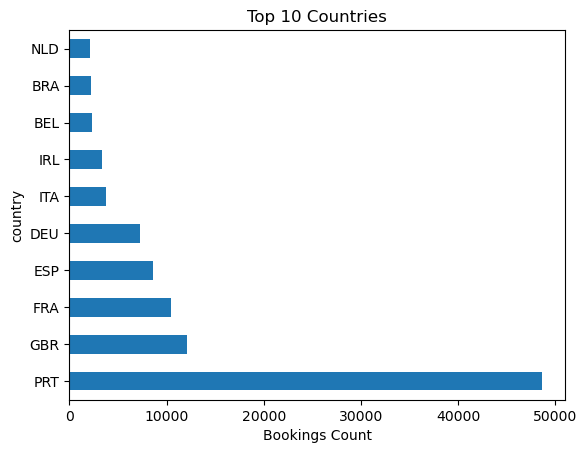

In [7]:
top_c = df['country'].value_counts().head(10)
top_c.plot(kind='barh')
plt.title("Top 10 Countries")
plt.xlabel("Bookings Count")
plt.show()

### Insight

#### Most international bookings are dominated by a few key countries.

#### Line Chart – Monthly Booking Trend

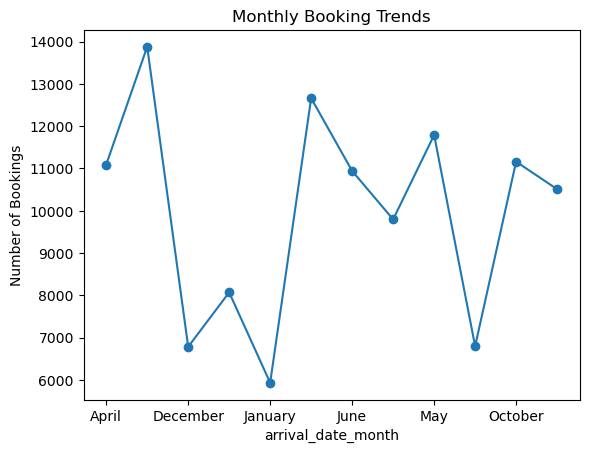

In [8]:
monthly = df.groupby('arrival_date_month').size()
monthly.plot(kind='line', marker='o')
plt.title("Monthly Booking Trends")
plt.ylabel("Number of Bookings")
plt.show()

### Insight

#### Shows seasonal patterns; peak travel months are clearly visible.

#### Scatter Plot – Lead Time vs Cancellation

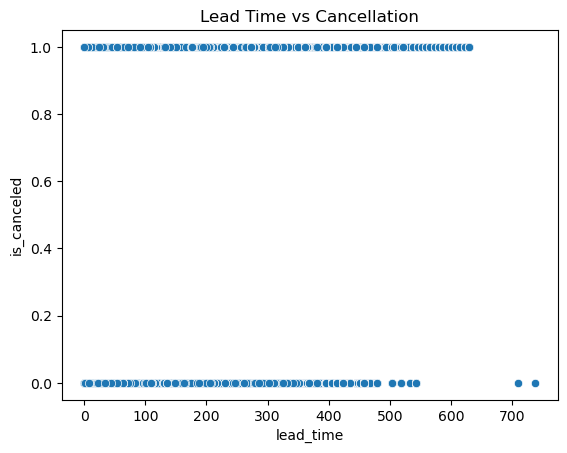

In [11]:
sns.scatterplot(x=df['lead_time'], y=df['is_canceled'])
plt.title("Lead Time vs Cancellation")
plt.show()

### Insight

#### Higher lead time strongly increases cancellation possibility.

#### Correlation of Numerical Features (Heatmap)

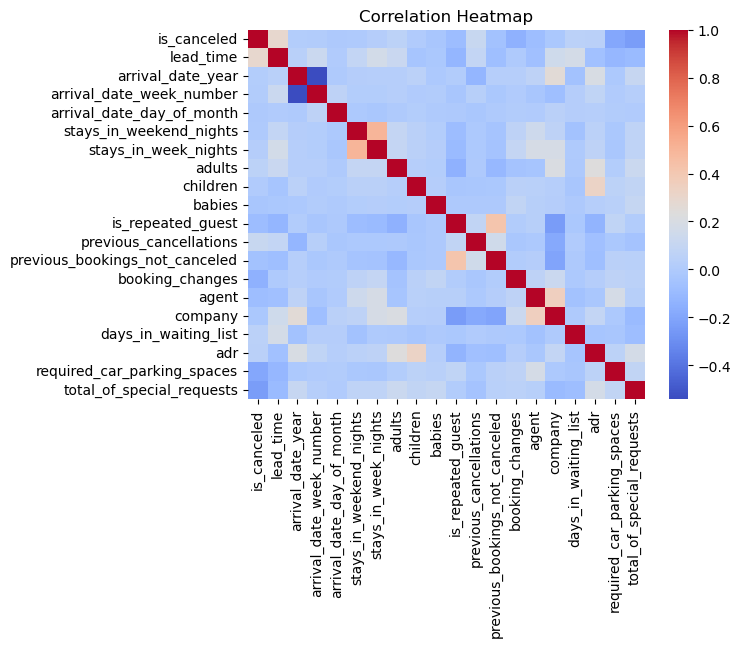

In [12]:
num_cols = df.select_dtypes(include=['int64','float64'])
sns.heatmap(num_cols.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insight

#### Helps identify relationships, e.g., longer stays → higher total nights amount.

#### Market Segment by Cancellation ( Stacked Bar Chart)

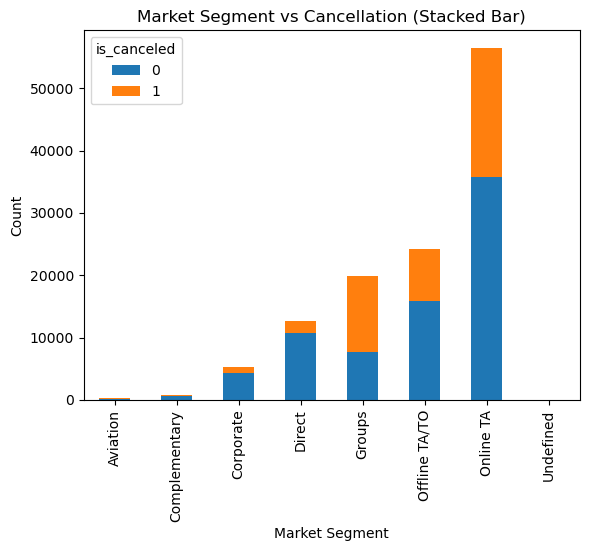

In [13]:
stack = pd.crosstab(df['market_segment'], df['is_canceled'])
stack.plot(kind='bar', stacked=True)
plt.title("Market Segment vs Cancellation (Stacked Bar)")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.show()

### Insight

#### Online travel agencies contribute to both highest bookings and highest cancellations.

#### 🔑 Key Insights

> A high number of booking cancellations were observed, especially in City Hotels.

> Longer lead time increases the chance of booking cancellation.

> Most customers prefer BB (Bed & Breakfast) meal type.

> Online Travel Agents (OTA) are the largest source of bookings.

> Bookings peak during summer months, showing clear seasonality.

> Customers with no deposit cancel more frequently.

> Majority of guests are two adults with no children.

> Repeated guests have a lower cancellation rate.

#### ✅ Recommendations

* Introduce discount offers for long lead-time bookings to reduce cancellations.

* Encourage customers to choose non-refundable deposit types by giving small benefits.

* Focus marketing more on OTA platforms as they bring maximum bookings.

* Provide special seasonal offers during low-demand months.

* Improve loyalty benefits for repeated guests to increase retention.

* Optimize room pricing based on seasonal demand patterns.

#### 📌 Project Summary

This project focuses on analyzing hotel booking data using Exploratory Data Analysis (EDA) techniques. The dataset was first cleaned by handling missing values, correcting data types, and removing inconsistencies. Various numerical and categorical features were analyzed through visualizations and statistical summaries.

The analysis revealed meaningful patterns related to cancellations, booking sources, guest types, and seasonal trends. These insights can help hotel management improve pricing strategies, customer retention, and revenue management. Overall, this project demonstrates how data analysis can be effectively used to solve real-world business problems in the hospitality industry.